In [23]:
# import pandas
import pandas as pd
import numpy as np

In [24]:
from google.colab import files
files.upload()

Saving Ice Cream Sales - temperatures.csv to Ice Cream Sales - temperatures (1).csv


{'Ice Cream Sales - temperatures (1).csv': b'Temperature,Ice Cream Profits\r\n39,13.17\r\n40,11.88\r\n41,18.82\r\n42,18.65\r\n43,17.02\r\n43,15.88\r\n44,19.07\r\n44,19.57\r\n45,21.62\r\n45,22.34\r\n45,19.23\r\n46,21.25\r\n46,19.81\r\n47,22.12\r\n48,24.22\r\n48,24.68\r\n48,23.78\r\n48,26.41\r\n48,25.01\r\n48,22.29\r\n49,27.81\r\n49,23.54\r\n50,22.89\r\n50,25.68\r\n50,27.29\r\n50,27.64\r\n50,27.31\r\n51,21.93\r\n51,32.18\r\n52,30.67\r\n52,28.05\r\n52,28.82\r\n52,27.87\r\n52,29.39\r\n53,32.60\r\n53,31.62\r\n53,25.71\r\n53,28.48\r\n54,30.09\r\n54,33.58\r\n54,29.75\r\n54,31.94\r\n54,33.71\r\n54,28.37\r\n54,27.41\r\n54,27.99\r\n54,30.37\r\n55,27.68\r\n55,29.53\r\n55,33.91\r\n55,34.19\r\n56,33.22\r\n56,34.47\r\n57,30.89\r\n57,35.80\r\n58,33.44\r\n58,36.79\r\n58,31.56\r\n58,35.13\r\n58,36.11\r\n58,32.39\r\n59,38.18\r\n59,29.69\r\n59,38.47\r\n59,37.74\r\n59,36.71\r\n59,32.29\r\n59,37.50\r\n59,35.33\r\n60,35.06\r\n60,36.25\r\n60,40.25\r\n60,39.69\r\n60,40.95\r\n61,37.96\r\n61,38.10\r\n61,38.21\r

In [30]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('/Ice cream.csv')

# display the first 5 rows
data.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [31]:
# display the last 5 rows
data.tail()

,Temperature,Ice Cream Profits
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91
364,101,85.02


In [32]:
# check the shape of the DataFrame (rows, columns)
data.shape

(365, 2)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data


In [33]:
# conventional way to import seaborn
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

<Axes: xlabel='Temperature', ylabel='Ice Cream Profits'>

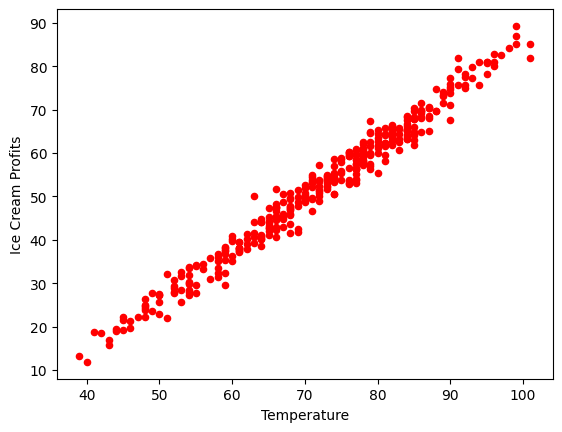

In [35]:
data.plot(kind='scatter',x='Temperature',y='Ice Cream Profits',color='red')
#data.plot(kind='scatter',x='Radio',y='Sales',color='blue')
#data.plot(kind='scatter',x='TV',y='Sales',color='green')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [37]:
# create a Python list of feature names
feature_cols = ['Temperature']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['Temperature']]

# print the first 5 rows
X.head()


,Temperature
0,39
1,40
2,41
3,42
4,43


In [38]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(365, 1)


In [40]:
# select a Series from the DataFrame
lab = ['Ice Cream Profits']

# equivalent command that works if there are no spaces in the column name
y =  data['Ice Cream Profits']



# print the first 5 values
y.head()

0    13.17
1    11.88
2    18.82
3    18.65
4    17.02
Name: Ice Cream Profits, dtype: float64

In [43]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(365,)


## Splitting X and y into training and testing sets

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train = X_train[:150]

print(X_test)

(273, 1)
(273,)
(92, 1)
(92,)
     Temperature
354           95
185           74
167           72
175           72
314           86
..           ...
12            46
293           84
309           85
232           78
364          101

[92 rows x 1 columns]


## Linear regression in scikit-learn

In [46]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
model = linreg.fit(X_train, y_train)



### Making predictions

In [47]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)

[79.29691623 54.45208002 52.08590515 52.08590515 68.64912928 71.01530416
 61.55060465 56.8182549  78.11382879 17.77636943 67.46604184 74.56456647
 59.18442978 42.62120564 46.17046795 62.73369209 84.02926598 37.88885588
 54.45208002 72.1983916  56.8182549  41.4381182  60.36751721 62.73369209
 44.98738051 54.45208002 50.90281771 46.17046795 60.36751721 41.4381182
 17.77636943 47.35355539 44.98738051 50.90281771 23.69180662 79.29691623
 49.71973027 36.70576845 44.98738051 58.00134234 21.32563175 23.69180662
 58.00134234 42.62120564 66.28295441 30.79033125 72.1983916  52.08590515
 65.09986697 54.45208002 67.46604184 36.70576845 60.36751721 63.91677953
 22.50871919 36.70576845 60.36751721 54.45208002 44.98738051 65.09986697
 60.36751721 67.46604184 18.95945687 50.90281771 84.02926598 41.4381182
 61.55060465 63.91677953 53.26899258 73.38147904 43.80429308 27.24106894
 65.09986697 39.07194332 58.00134234 60.36751721 39.07194332 73.38147904
 79.29691623 47.35355539 58.00134234 78.11382879 30.7

We need an **evaluation metric** in order to compare our predictions with the actual values!